y evaluated at time t = 4.000000000000003 seconds: 1.2905188338075795


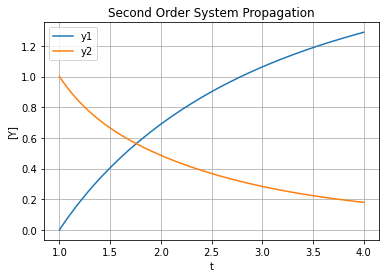

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Runge-Kutta (RK4) Numerical Integration for System of First-Order Differential Equations

def ode_system(self, _t, _y):
    """
    system of first order differential equations
    _t: discrete time step value
    _y: state vector [y1, y2, y3]
    """
    
    C = self.Cs*self.Ci*self.N/(s*self.Cs + i*self.Ci + z*self.Cz)
    
    dsdt = C*self.beta*_y[0]*(_y[1]/self.N) + self.mu*self.N - self.mu*_y[0]
    didt = C*self.beta*_y[0]*(_y[1]/self.N) + self.phi*_y[2]*(_y[1]/self.N) - (self.gamma + self.mu)*_y[1]
    dzdt = self.gamma*_y[1] - self.phi*_y[2]*(_y[1]/self.N) - self.mu*_y[2]
    
    return np.array([dsdt, didt, dzdt])


def rk4(func, tk, _yk, _dt=0.01, **kwargs):
    """
    single-step fourth-order numerical integration (RK4) method
    func: system of first order ODEs
    tk: current time step
    _yk: current state vector [y1, y2, y3, ...]
    _dt: discrete time step size
    **kwargs: additional parameters for ODE system
    returns: y evaluated at time k+1
    """

    # evaluate derivative at several stages within time interval
    f1 = func(tk, _yk, **kwargs)
    f2 = func(tk + _dt / 2, _yk + (f1 * (_dt / 2)), **kwargs)
    f3 = func(tk + _dt / 2, _yk + (f2 * (_dt / 2)), **kwargs)
    f4 = func(tk + _dt, _yk + (f3 * _dt), **kwargs)

    # return an average of the derivative over tk, tk + dt
    return _yk + (_dt / 6) * (f1 + (2 * f2) + (2 * f3) + f4)

# ==============================================================
# simulation harness

dt = 0.01
time = np.arange(1.0, 4.0 + dt, dt)

# second order system initial conditions [y1, y2] at t = 1
y0 = np.array([0, 1])

# ==============================================================
# propagate state

# simulation results
state_history = []

# initialize yk
yk = y0

# intialize time
t = 0

# approximate y at time t
for t in time:
    state_history.append(yk)
    yk = rk4(ode_system, t, yk, dt)

# convert list to numpy array
state_history = np.array(state_history)

print(f'y evaluated at time t = {t} seconds: {yk[0]}')

# ==============================================================
# plot history

fig, ax = plt.subplots()
ax.plot(time, state_history[:, 0])
ax.plot(time, state_history[:, 1])
ax.set(xlabel='t', ylabel='[Y]', title='Second Order System Propagation')
plt.legend(['y1', 'y2'])
ax.grid()
plt.show()

In [2]:
time

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09,
       2.1 , 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2 ,
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.